In [1]:
# Install unrar package to work with rar files

!pip install unrar==0.4

In [2]:
import os

from glob import glob
from multiprocessing import Pool, cpu_count

import cv2
import gdown
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from google.colab.patches import cv2_imshow

In [3]:
# Download dataset from google drive
# Source : https://www.kaggle.com/datasciencemlclub/burmesecharactersanddigit

url = 'https://drive.google.com/uc?id=1JbD-xMQmcq6lT5gDjE5WiwJJ13ywe7J6'
output = 'burmese_digits_and_characters.rar'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JbD-xMQmcq6lT5gDjE5WiwJJ13ywe7J6
From (redirected): https://drive.google.com/uc?id=1JbD-xMQmcq6lT5gDjE5WiwJJ13ywe7J6&confirm=t&uuid=50240232-36c9-43fd-9bc1-078b5608a163
To: /content/burmese_digits_and_characters.rar
100%|██████████| 129M/129M [00:00<00:00, 139MB/s]


In [4]:
# Unrar the downloaded dataset

source_folder = "BurmeseCharacterDataSets"

if not os.path.exists(source_folder):
  get_ipython().system_raw("unrar x '{}'".format(output))

In [5]:
# Unrar the digits and store them in a folder named 'data'

data_folder = "data"

if not os.path.exists(data_folder):
  get_ipython().system_raw("unrar x '{}/0.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/1.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/2.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/3.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/4.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/5.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/6.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/7.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/8.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/9.rar' '{}/'".format(source_folder, data_folder))

In [6]:
# Check the available number of images per class

class_0 = glob("{}/0/*.jpg".format(data_folder))
class_1 = glob("{}/1/*.jpg".format(data_folder))
class_2 = glob("{}/2/*.jpg".format(data_folder))
class_3 = glob("{}/3/*.jpg".format(data_folder))
class_4 = glob("{}/4/*.jpg".format(data_folder))
class_5 = glob("{}/5/*.jpg".format(data_folder))
class_6 = glob("{}/6/*.jpg".format(data_folder))
class_7 = glob("{}/7/*.jpg".format(data_folder))
class_8 = glob("{}/8/*.jpg".format(data_folder))
class_9 = glob("{}/9/*.jpg".format(data_folder))

print("Number of images per class")
print("Class 0: {}".format(len(class_0)))
print("Class 1: {}".format(len(class_1)))
print("Class 2: {}".format(len(class_2)))
print("Class 3: {}".format(len(class_3)))
print("Class 4: {}".format(len(class_4)))
print("Class 5: {}".format(len(class_5)))
print("Class 6: {}".format(len(class_6)))
print("Class 7: {}".format(len(class_7)))
print("Class 8: {}".format(len(class_8)))
print("Class 9: {}".format(len(class_9)))

Number of images per class
Class 0: 222
Class 1: 222
Class 2: 222
Class 3: 222
Class 4: 222
Class 5: 222
Class 6: 222
Class 7: 222
Class 8: 222
Class 9: 222


(219, 310, 3)


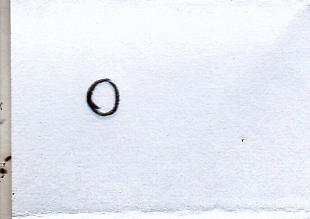

In [7]:
# Let's take a look at one of the image

img = cv2.imread(class_0[1])
print(img.shape)
cv2_imshow(img)

(200, 200, 3)


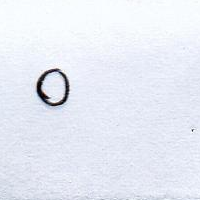

In [8]:
# It's quite big. Let's crop the image and make it square

crop_img = img[10:210, 50:250]
print(crop_img.shape)
cv2_imshow(crop_img)

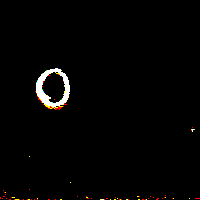

In [9]:
# Let's sharpen it to give more contrast

sharpened_image = cv2.threshold(crop_img, 200, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(sharpened_image[-1])

In [10]:
# Preparing to store processed images
new_path = "data/processed/"

for i in range(10):
  if not os.path.exists(new_path + str(i)):
    os.makedirs(new_path + str(i))

In [11]:
# Apply processing steps to all the images in each image folder

def process_image(image):
  img = cv2.imread(image)
  crop_img = img[10:210, 50:250]
  _, sharpened_image = cv2.threshold(img, 200, 255,cv2.THRESH_BINARY_INV)

  new_path = image.replace("data/", "data/processed/")
  cv2.imwrite(new_path, sharpened_image)


if __name__ == "__main__":
  with Pool(processes=cpu_count()-1) as pool:
    pool.map(process_image, class_0)
    pool.map(process_image, class_1)
    pool.map(process_image, class_2)
    pool.map(process_image, class_3)
    pool.map(process_image, class_4)
    pool.map(process_image, class_5)
    pool.map(process_image, class_6)
    pool.map(process_image, class_7)
    pool.map(process_image, class_8)
    pool.map(process_image, class_9)

In [12]:
# Prepare images for model training: data augmentation, split into train and validation sets, etc
import tensorflow as tf

batch_size = 32
image_size=[200, 200]
seed = 42
val_split = 0.3

np.random.seed(42)
tf.random.set_seed(42)

train_images = keras.preprocessing.image_dataset_from_directory(
    new_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset="training",
    interpolation="nearest")

val_images = keras.preprocessing.image_dataset_from_directory(
    new_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset="validation",
    interpolation="nearest")

# Prefect images so that I/O operations do not become a bottleneck
train_images = train_images.prefetch(buffer_size=batch_size)
val_images = val_images.prefetch(buffer_size=batch_size)

Found 2220 files belonging to 10 classes.
Using 1554 files for training.
Found 2220 files belonging to 10 classes.
Using 666 files for validation.


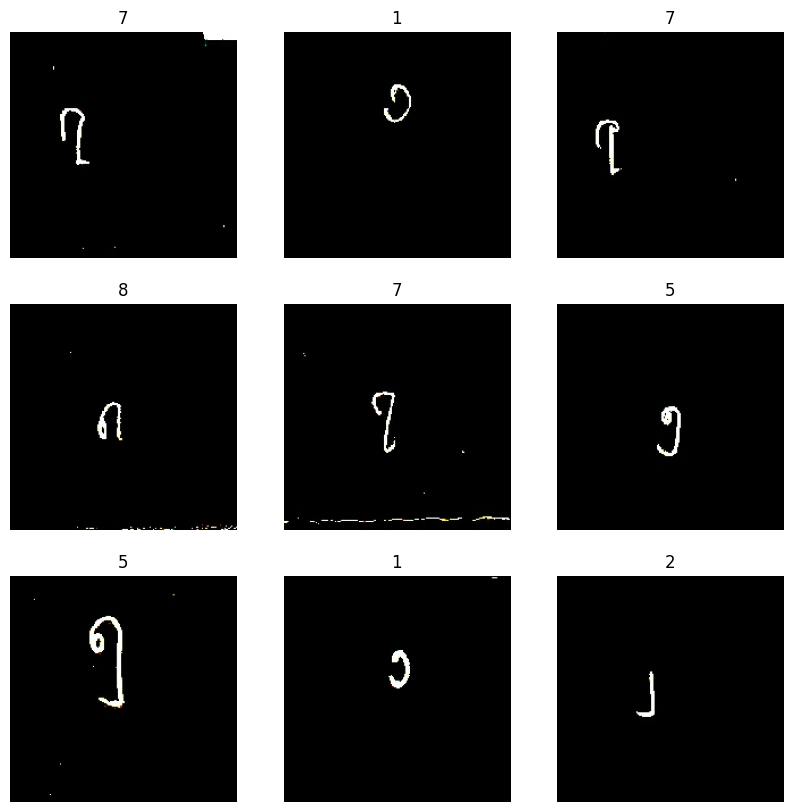

In [13]:
# Peek into the prepared images (sanity check)

plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(np.argmax(labels[i]))
        plt.axis("off")

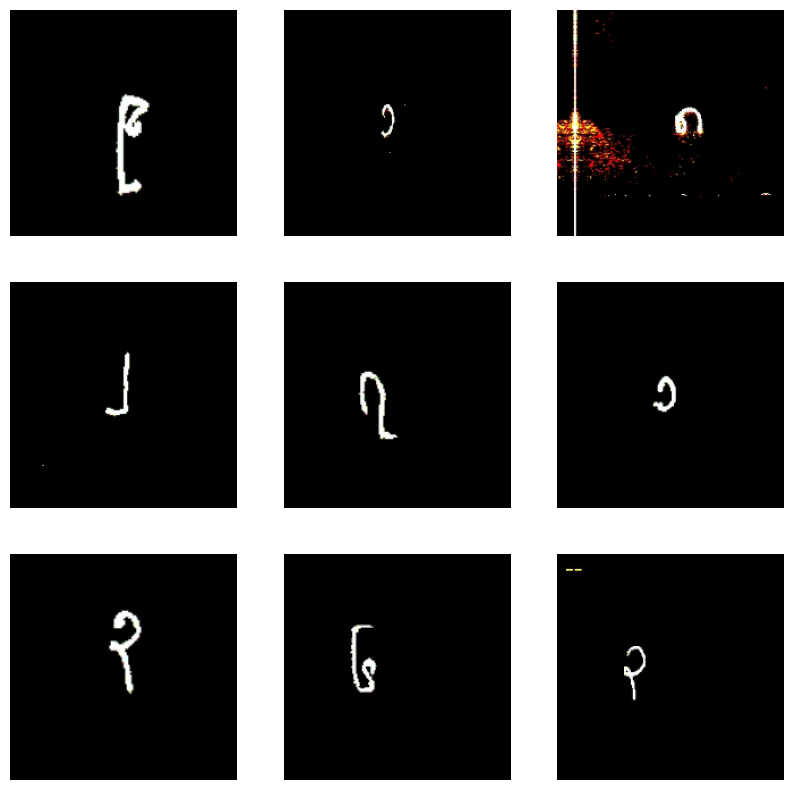

In [14]:
# Augment train data by adding a few data augmentation tricks (provides more training data)

data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_images.take(1):
    augmented_images = data_augmentation(images)  # Apply augmentation here
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Use augmented_images[i] to access the ith augmented image
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")


In [15]:
# Download a pre-trained model (we are doing transfer learning)

input_shape = image_size + [3]  # 3 channels (RGB)

base_model = keras.applications.InceptionV3(weights='imagenet',  # load imaget net weights,
                                         input_shape=input_shape,
                                         include_top=False,  # don't include the top layer (classification layer)
                                         pooling='avg')  # use average pooling method

base_model.trainable = False
base_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 99, 99, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 99, 99, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [16]:
# Build the final classification model

model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(data_augmentation)
model.add(base_model)
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2, seed=seed))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 22857002 (87.19 MB)
Trainable params: 1054218 (4.02 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [17]:
# Save the best model with lowest validation loss using checkpoint callback

checkpoint_path = os.path.join("checkpoint", "best_model")
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_scheduler = LearningRateScheduler(scheduler)


In [19]:
epochs = 100  # Adjusted from 500 to a lower value as a starting point

r = model.fit(
    train_images,
    epochs=epochs,
    validation_data=val_images,
    callbacks=[model_checkpoint_callback, early_stopping, lr_scheduler]
)


Epoch 1/100
49/49 [==============================] - 21s 207ms/step - loss: 14.5830 - accuracy: 0.1583 - val_loss: 5.8011 - val_accuracy: 0.2838 - lr: 1.0000e-04
Epoch 2/100
49/49 [==============================] - 5s 101ms/step - loss: 7.6701 - accuracy: 0.3089 - val_loss: 3.6928 - val_accuracy: 0.4595 - lr: 1.0000e-04
Epoch 3/100
49/49 [==============================] - 5s 92ms/step - loss: 4.8885 - accuracy: 0.3687 - val_loss: 2.9820 - val_accuracy: 0.5060 - lr: 1.0000e-04
Epoch 4/100
49/49 [==============================] - 5s 90ms/step - loss: 3.2414 - accuracy: 0.4614 - val_loss: 2.1607 - val_accuracy: 0.5270 - lr: 1.0000e-04
Epoch 5/100
49/49 [==============================] - 6s 126ms/step - loss: 2.4409 - accuracy: 0.4897 - val_loss: 1.8022 - val_accuracy: 0.5661 - lr: 1.0000e-04
Epoch 6/100
49/49 [==============================] - 5s 91ms/step - loss: 1.9159 - accuracy: 0.5373 - val_loss: 1.6244 - val_accuracy: 0.5781 - lr: 1.0000e-04
Epoch 7/100
49/49 [======================

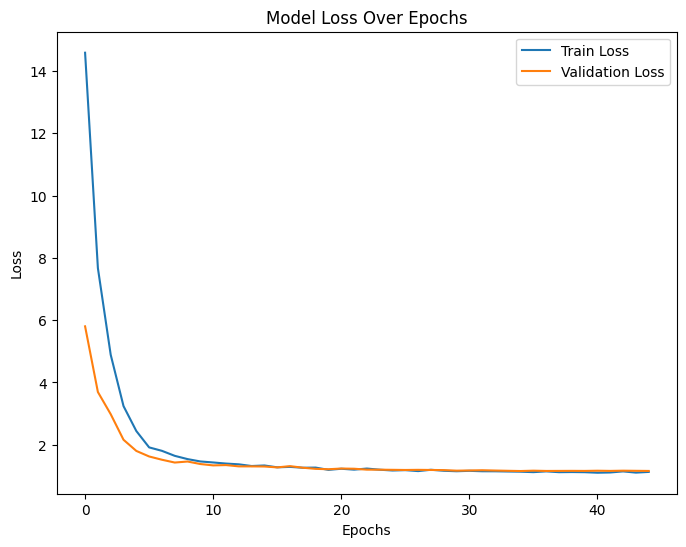

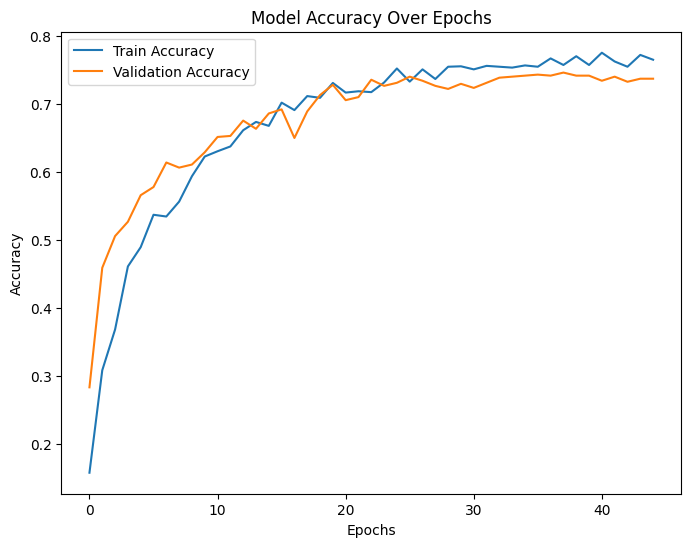

In [20]:
# Plot for loss
plt.figure(figsize=(8, 6))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot for accuracy (if you're tracking it)
plt.figure(figsize=(8, 6))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
test_loss, test_accuracy = model.evaluate(val_images)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


21/21 [==============================] - 1s 53ms/step - loss: 1.1571 - accuracy: 0.7417
Test Loss: 1.1571427583694458
Test Accuracy: 0.7417417168617249


1/1 [==============================] - 2s 2s/step


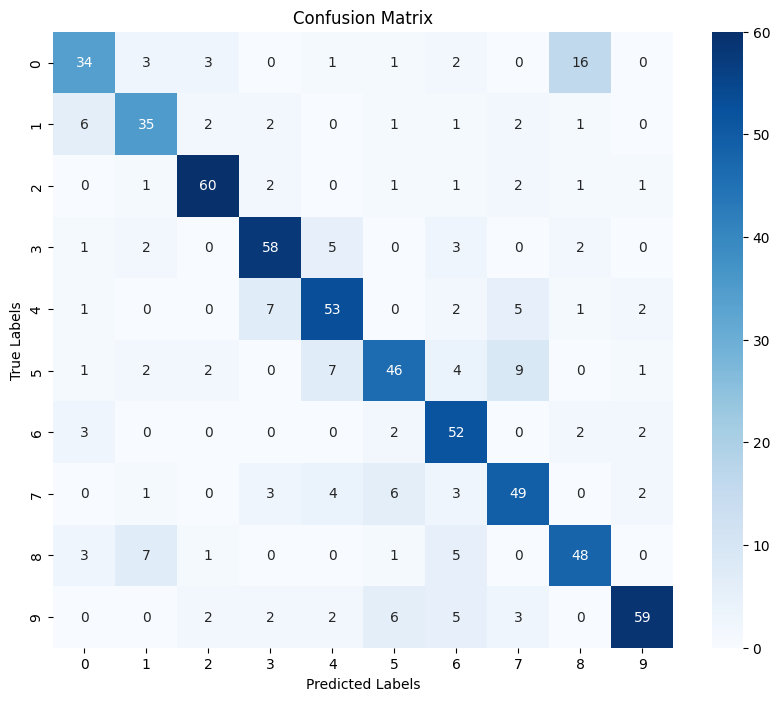

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
val_predictions = []
val_labels = []
for images, labels in val_images:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(labels.numpy(), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Create a list of class names based on the indices
class_names = [str(i) for i in range(10)]

# Now, you can use class_names in your classification_report
from sklearn.metrics import classification_report

# Ensure val_labels and val_predictions are properly defined before this step
print(classification_report(val_labels, val_predictions, target_names=class_names))


              precision    recall  f1-score   support

           0       0.69      0.57      0.62        60
           1       0.69      0.70      0.69        50
           2       0.86      0.87      0.86        69
           3       0.78      0.82      0.80        71
           4       0.74      0.75      0.74        71
           5       0.72      0.64      0.68        72
           6       0.67      0.85      0.75        61
           7       0.70      0.72      0.71        68
           8       0.68      0.74      0.71        65
           9       0.88      0.75      0.81        79

    accuracy                           0.74       666
   macro avg       0.74      0.74      0.74       666
weighted avg       0.75      0.74      0.74       666



In [32]:
class_names = ['ClassName0', 'ClassName1', 'ClassName2', 'ClassName3', 'ClassName4', 'ClassName5', 'ClassName6', 'ClassName7', 'ClassName8', 'ClassName9']


In [35]:
from sklearn.metrics import classification_report

print(classification_report(val_labels, val_predictions, target_names=class_names))


              precision    recall  f1-score   support

  ClassName0       0.69      0.57      0.62        60
  ClassName1       0.69      0.70      0.69        50
  ClassName2       0.86      0.87      0.86        69
  ClassName3       0.78      0.82      0.80        71
  ClassName4       0.74      0.75      0.74        71
  ClassName5       0.72      0.64      0.68        72
  ClassName6       0.67      0.85      0.75        61
  ClassName7       0.70      0.72      0.71        68
  ClassName8       0.68      0.74      0.71        65
  ClassName9       0.88      0.75      0.81        79

    accuracy                           0.74       666
   macro avg       0.74      0.74      0.74       666
weighted avg       0.75      0.74      0.74       666



In [36]:
from sklearn.metrics import classification_report

print(classification_report(val_labels, val_predictions, target_names=class_names))


              precision    recall  f1-score   support

  ClassName0       0.69      0.57      0.62        60
  ClassName1       0.69      0.70      0.69        50
  ClassName2       0.86      0.87      0.86        69
  ClassName3       0.78      0.82      0.80        71
  ClassName4       0.74      0.75      0.74        71
  ClassName5       0.72      0.64      0.68        72
  ClassName6       0.67      0.85      0.75        61
  ClassName7       0.70      0.72      0.71        68
  ClassName8       0.68      0.74      0.71        65
  ClassName9       0.88      0.75      0.81        79

    accuracy                           0.74       666
   macro avg       0.74      0.74      0.74       666
weighted avg       0.75      0.74      0.74       666



# Fine Tuining

In [37]:
model.save('my_burmese_Digit_recognizer_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
!ls


BurmeseCharacterDataSets	   checkpoint  drive				     sample_data
burmese_digits_and_characters.rar  data        my_burmese_Digit_recognizer_model.h5


In [40]:
drive_path = '/content/drive/My Drive/MyModels/'
model_name = 'my_burmese_Digit_recognizer_model.h5'
model_path = drive_path + model_name


In [41]:
model.save(model_path)


In [42]:
from google.colab import files
files.download('my_burmese_Digit_recognizer_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Retrain the Model (FineTune)


In [43]:
from tensorflow.keras.models import load_model

# If the model is saved in Google Drive, mount the drive first
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path to where your model is saved
model_path = '/content/drive/My Drive/MyModels/my_burmese_Digit_recognizer_model.h5'
model = load_model(model_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
from tensorflow.keras.optimizers import Adam

# Adjust the learning rate
new_learning_rate = 1e-5
model.compile(optimizer=Adam(learning_rate=new_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [45]:
# Unfreeze the entire model or a portion of it
base_model.trainable = True

# It's common to fine-tune the top layers
fine_tune_at = 100  # Example layer number from which you start fine-tuning
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Re-compile the model for these changes to take effect
model.compile(optimizer=Adam(learning_rate=new_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'new_path_to_save/best_model_{epoch:02d}.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Include other callbacks as needed, such as early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [47]:
additional_epochs = 25  # Or whatever number you see fit

history = model.fit(train_images,
                    epochs=additional_epochs,
                    validation_data=val_images,
                    callbacks=[model_checkpoint_callback, early_stopping])


Epoch 1/25
49/49 [==============================] - 11s 115ms/step - loss: 0.7483 - accuracy: 0.7651 - val_loss: 0.7819 - val_accuracy: 0.7477
Epoch 2/25
49/49 [==============================] - 5s 94ms/step - loss: 0.7020 - accuracy: 0.7683 - val_loss: 0.7745 - val_accuracy: 0.7387
Epoch 3/25
49/49 [==============================] - 4s 85ms/step - loss: 0.7486 - accuracy: 0.7535 - val_loss: 0.7523 - val_accuracy: 0.7417
Epoch 4/25
49/49 [==============================] - 5s 107ms/step - loss: 0.7525 - accuracy: 0.7593 - val_loss: 0.7737 - val_accuracy: 0.7297
Epoch 5/25
49/49 [==============================] - 5s 98ms/step - loss: 0.6747 - accuracy: 0.7748 - val_loss: 0.7433 - val_accuracy: 0.7372
Epoch 6/25
49/49 [==============================] - 5s 88ms/step - loss: 0.6692 - accuracy: 0.7773 - val_loss: 0.7436 - val_accuracy: 0.7492
Epoch 7/25
49/49 [==============================] - 5s 88ms/step - loss: 0.6662 - accuracy: 0.7735 - val_loss: 0.7269 - val_accuracy: 0.7447
Epoch 8/25

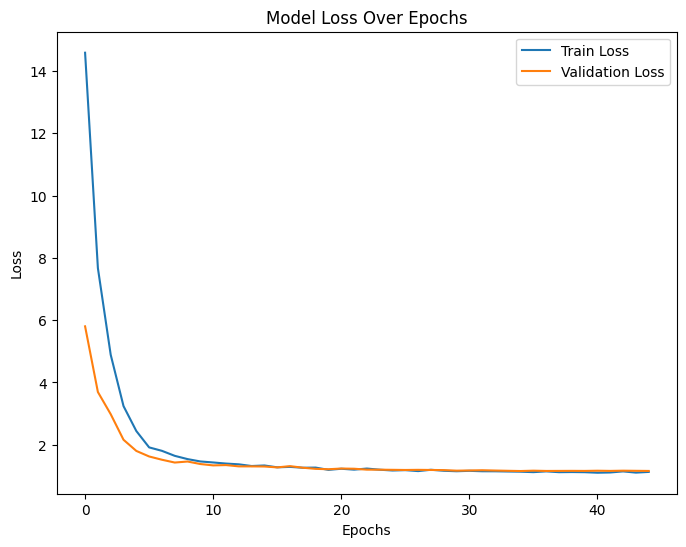

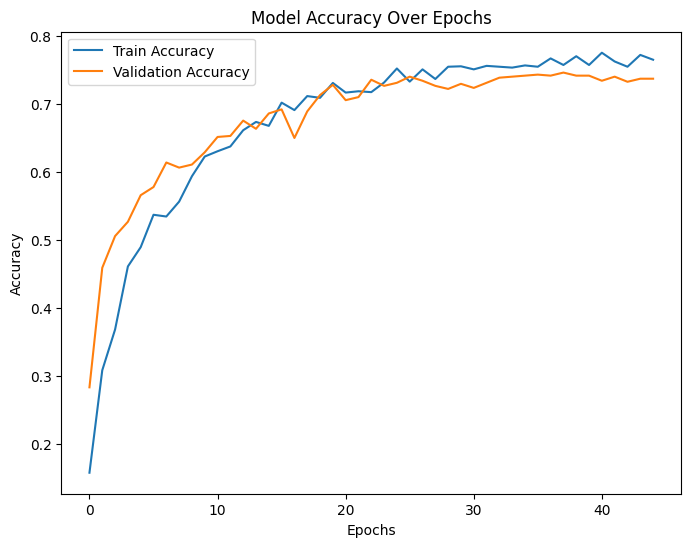

In [48]:
# Plot for loss
plt.figure(figsize=(8, 6))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot for accuracy (if you're tracking it)
plt.figure(figsize=(8, 6))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
model.save('best_burmese_Digit_recognizer_model.h5')


In [50]:
!ls


best_burmese_Digit_recognizer_model.h5	checkpoint  my_burmese_Digit_recognizer_model.h5
BurmeseCharacterDataSets		data	    new_path_to_save
burmese_digits_and_characters.rar	drive	    sample_data


In [51]:
drive_path = '/content/drive/My Drive/MyModels/'
model_name = 'best_burmese_Digit_recognizer_model.h5'
model_path = drive_path + model_name
model.save(model_path)


In [52]:
from google.colab import files
files.download('best_burmese_Digit_recognizer_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
model = load_model('best_burmese_Digit_recognizer_model.h5')


In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image
import requests
from io import BytesIO


In [55]:
from PIL import Image
import numpy as np
import requests
from tensorflow.keras.preprocessing import image
from io import BytesIO

def process_image_from_url(image_url, target_size=(200, 200)):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Resize the image
    img = img.resize(target_size)

    # Convert to RGB if it's not already (in case it's grayscale or has an alpha channel)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension for compatibility with the model
    return img_array

# Now, replace the 'image_url' with your actual image URL and use this function
# to process your image before prediction:
image_url = 'https://www.promarinetrade.com/cache/promarine/public/shop_product_picture/_1200x800x0/4626_O.jpg'
img_array = process_image_from_url(image_url, target_size=(200, 200))

# Assuming 'model' is your pre-loaded model:
prediction = model.predict(img_array)

# Post-process the prediction if necessary, for example:
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class ID:", predicted_class)


1/1 [==============================] - 3s 3s/step
Predicted class ID: [0]


In [56]:
from tensorflow.keras.models import load_model

# If the model is saved in Google Drive, mount the drive first
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path to where your model is saved
model_path = '/content/drive/My Drive/MyModels/best_burmese_Digit_recognizer_model.h5'
model = load_model(model_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
from tensorflow.keras.optimizers import Adam

# Adjust the learning rate
new_learning_rate = 1e-5
model.compile(optimizer=Adam(learning_rate=new_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
# Unfreeze the entire model or a portion of it
base_model.trainable = True

# It's common to fine-tune the top layers
fine_tune_at = 100  # Example layer number from which you start fine-tuning
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

# Re-compile the model for these changes to take effect
model.compile(optimizer=Adam(learning_rate=new_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'new_path_to_save/best_model_{epoch:02d}.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Include other callbacks as needed, such as early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [ ]:
additional_epochs = 50  # Or whatever number you see fit

history = model.fit(train_images,
                    epochs=additional_epochs,
                    validation_data=val_images,
                    callbacks=[model_checkpoint_callback, early_stopping])


Epoch 1/50
49/49 [==============================] - 11s 133ms/step - loss: 0.5891 - accuracy: 0.8031 - val_loss: 0.7067 - val_accuracy: 0.7628
Epoch 2/50
49/49 [==============================] - 5s 90ms/step - loss: 0.5462 - accuracy: 0.8089 - val_loss: 0.6822 - val_accuracy: 0.7718
Epoch 3/50
49/49 [==============================] - 6s 116ms/step - loss: 0.5861 - accuracy: 0.8082 - val_loss: 0.6723 - val_accuracy: 0.7763
Epoch 4/50
49/49 [==============================] - 5s 96ms/step - loss: 0.5794 - accuracy: 0.8024 - val_loss: 0.6684 - val_accuracy: 0.7688
Epoch 5/50
49/49 [==============================] - 7s 136ms/step - loss: 0.5903 - accuracy: 0.8069 - val_loss: 0.6724 - val_accuracy: 0.7688
Epoch 6/50
49/49 [==============================] - 6s 118ms/step - loss: 0.5666 - accuracy: 0.8198 - val_loss: 0.6663 - val_accuracy: 0.7688
Epoch 7/50
49/49 [==============================] - 6s 110ms/step - loss: 0.5853 - accuracy: 0.8121 - val_loss: 0.6793 - val_accuracy: 0.7703
Epoch 8

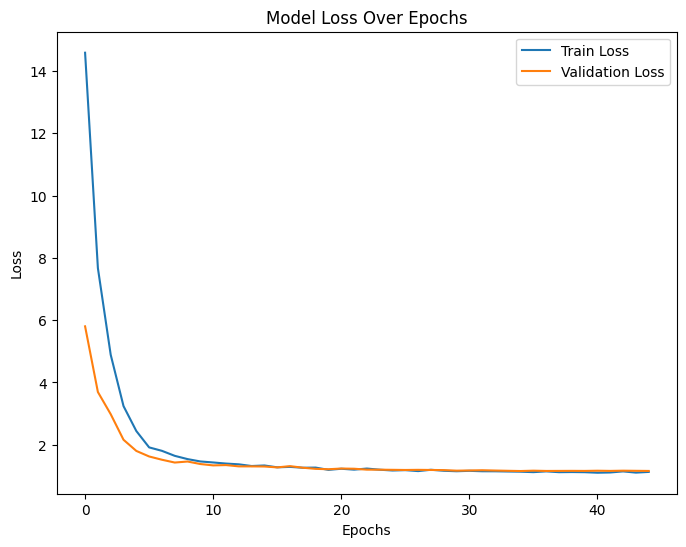

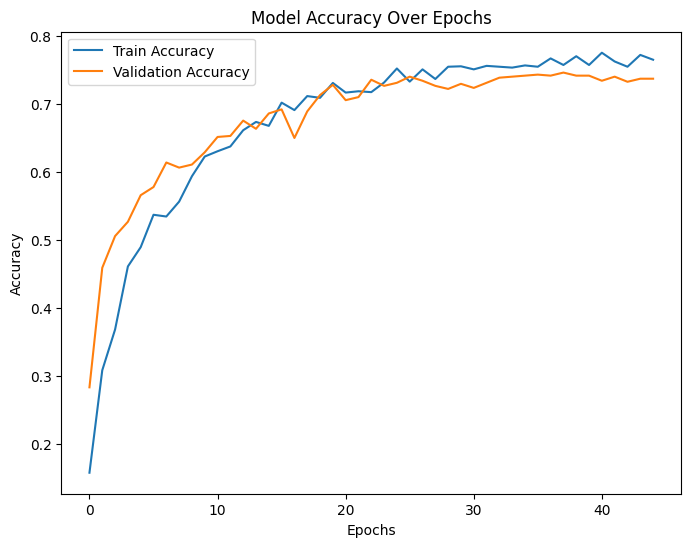

In [ ]:
# Plot for loss
plt.figure(figsize=(8, 6))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot for accuracy (if you're tracking it)
plt.figure(figsize=(8, 6))
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('last_burmese_Digit_recognizer_model.h5')


In [ ]:
drive_path = '/content/drive/My Drive/MyModels/'
model_name = 'last_burmese_Digit_recognizer_model.h5'
model_path = drive_path + model_name
model.save(model_path)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
val_predictions = []
val_labels = []
for images, labels in val_images:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(labels.numpy(), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming val_labels and val_predictions are available
cm = confusion_matrix(val_labels, val_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# This example assumes binary classification. For multi-class, you'll need to binarize labels
# and use a one-vs-all approach
fpr, tpr, thresholds = roc_curve(val_labels, val_predictions_proba[:, 1])  # val_predictions_proba is the predicted probability for the positive class
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(val_labels, val_predictions_proba[:, 1])

plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


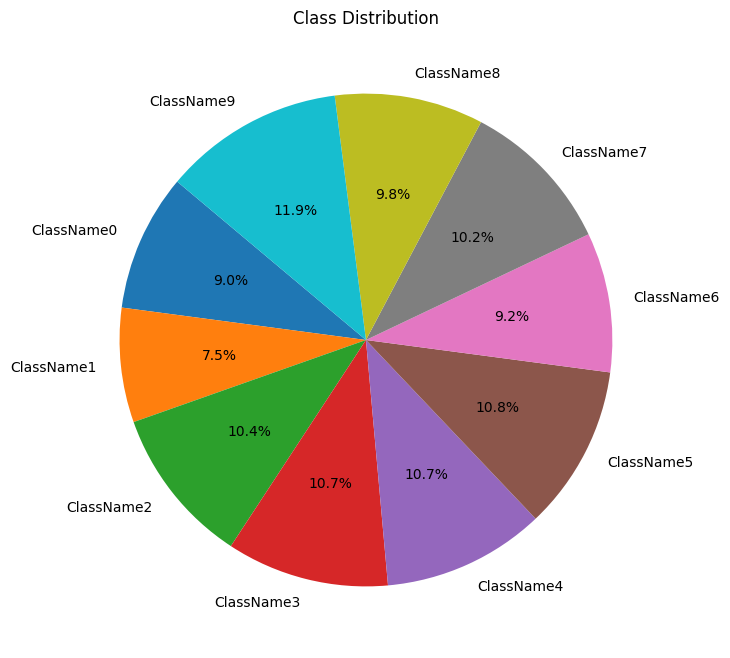

In [ ]:
import numpy as np

unique, counts = np.unique(val_labels, return_counts=True)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()


In [ ]:
# Assuming a trained model named 'model'
feature_importances = model.feature_importances_

# Assuming feature_names is a list of your feature names
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')
plt.show()
